___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Text Classification Assessment 

### Goal: Given a set of text movie reviews that have been labeled negative or positive

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

## Complete the tasks in bold below!

**Task: Perform imports and load the dataset into a pandas DataFrame**
For this exercise you can load the dataset from `'../DATA/moviereviews.csv'`.

In [1]:
# CODE HERE

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../DATA/moviereviews.csv')

In [3]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


**TASK: Check to see if there are any missing values in the dataframe.**

In [7]:
#CODE HERE

In [4]:
df.isnull().sum()

label      0
review    35
dtype: int64

label      0
review    35
dtype: int64

**TASK: Remove any reviews that are NaN**

In [5]:
#before removing NaNs
len(df)

2000

In [6]:
df = df.dropna()

In [7]:
#After removing NaNs
len(df)

1965

**TASK: Check to see if any reviews are blank strings and not just NaN. Note: This means a review text could just be: "" or "  " or some other larger blank string. How would you check for this? Note: There are many ways! Once you've discovered the reviews that are blank strings, go ahead and remove them as well. [Click me for a big hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isspace.html)**

In [8]:
len(df[df.review.str.isspace() == True])

27

27

In [9]:
df[df.review.str.isspace() == True]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [10]:
df = df[~df.review.str.isspace() == True]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


**TASK: Confirm the value counts per label:**

In [23]:
#CODE HERE

In [12]:
df["label"].value_counts()

neg    969
pos    969
Name: label, dtype: int64

pos    969
neg    969
Name: label, dtype: int64

## EDA on Bag of Words

**Bonus Task: Can you figure out how to use a CountVectorizer model to get the top 20 words (that are not english stop words) per label type? Note, this is a bonus task as we did not show this in the lectures. But a quick cursory Google search should put you on the right path.  [Click me for a big hint](https://stackoverflow.com/questions/16288497/find-the-most-common-term-in-scikit-learn-classifier)**

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

In [14]:
df_pos = df[df["label"] == "pos"]["review"]
df_neg = df[df["label"] == "neg"]["review"]

In [15]:
df_pos

2       this has been an extraordinary year for austra...
3       according to hollywood movies made in last few...
11      with stars like sigourney weaver ( " alien " t...
16      i remember hearing about this film when it fir...
18      garry shandling makes his long overdue starrin...
                              ...                        
1995    i like movies with albert brooks , and i reall...
1996    it might surprise some to know that joel and e...
1997    the verdict : spine-chilling drama from horror...
1998    i want to correct what i wrote in a former ret...
1999    a couple of months ago , when i first download...
Name: review, Length: 969, dtype: object

In [16]:
cv = CountVectorizer(stop_words="english")

In [21]:
matrix = cv.fit_transform(df_neg)

In [77]:
matrix.todense()

matrix([[0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [78]:
cv.get_feature_names()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '0009f',
 '007',
 '05',
 '10',
 '100',
 '1000',
 '10000',
 '100m',
 '101',
 '102',
 '103',
 '105',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '1138',
 '118',
 '12',
 '121',
 '122',
 '1272',
 '129',
 '1298',
 '12th',
 '13',
 '130',
 '1305',
 '135',
 '137',
 '139',
 '13th',
 '14',
 '143',
 '144',
 '14th',
 '15',
 '150',
 '1500s',
 '150th',
 '151',
 '152',
 '153',
 '155',
 '1554',
 '1583',
 '1590',
 '15th',
 '16',
 '160',
 '1600',
 '161',
 '165',
 '167',
 '16mm',
 '16th',
 '16x9',
 '17',
 '170',
 '175',
 '1773',
 '1791',
 '1792',
 '1793',
 '1794',
 '1799',
 '17th',
 '18',
 '180',
 '1800',
 '1800s',
 '1830s',
 '1839',
 '1847',
 '1862',
 '1888',
 '1899',
 '18th',
 '19',
 '1900',
 '1908',
 '1912',
 '1914',
 '1919',
 '1920s',
 '1922',
 '1930',
 '1930s',
 '1932',
 '1934',
 '1935',
 '1937',
 '1938',
 '1939',
 '1940',
 '1940s',
 '1941',
 '1943',
 '1944',
 '1945',
 '1946',
 '1947',
 '1948',
 '1949',
 '1950',
 '1950s',
 '1951',
 '1953',
 '1954',
 '1955',
 '1957',
 '195

In [81]:
matrix.sum(axis=0).tolist()[0]

[2,
 55,
 1,
 7,
 1,
 183,
 38,
 4,
 1,
 1,
 3,
 2,
 1,
 3,
 2,
 1,
 3,
 14,
 3,
 1,
 1,
 1,
 1,
 29,
 1,
 1,
 1,
 2,
 1,
 1,
 44,
 3,
 1,
 1,
 7,
 1,
 5,
 16,
 1,
 1,
 4,
 35,
 3,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 16,
 2,
 1,
 2,
 1,
 1,
 3,
 2,
 3,
 41,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 16,
 6,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 4,
 12,
 3,
 1,
 7,
 2,
 2,
 1,
 1,
 3,
 5,
 2,
 1,
 2,
 3,
 2,
 3,
 7,
 3,
 2,
 3,
 2,
 2,
 1,
 5,
 1,
 1,
 10,
 8,
 1,
 2,
 2,
 1,
 5,
 3,
 3,
 14,
 22,
 6,
 4,
 4,
 2,
 1,
 8,
 5,
 9,
 9,
 26,
 10,
 8,
 12,
 5,
 8,
 3,
 14,
 7,
 10,
 12,
 15,
 6,
 1,
 5,
 15,
 10,
 10,
 11,
 11,
 8,
 15,
 13,
 14,
 17,
 22,
 23,
 32,
 39,
 67,
 65,
 1,
 59,
 17,
 3,
 42,
 11,
 24,
 26,
 1,
 3,
 1,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 15,
 10,
 1,
 1,
 6,
 12,
 1,
 5,
 11,
 2,
 1,
 2,
 22,
 2,
 3,
 4,
 1,
 6,
 4,
 1,
 1,
 1,
 6,
 1,
 4,
 2,
 41,
 8,
 1,
 1,
 7,
 1,
 1,
 6,
 1,
 1,
 2,
 12,
 1,
 3,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 3,
 3,
 5,
 4,
 25,
 1,
 5,
 3,
 4,
 1,
 1,


In [86]:
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0]) 
print(sorted(freqs, key=lambda x: -x[1])[:20])

[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


In [87]:
matrix = cv.fit_transform(df_pos)
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0]) 
print(sorted(freqs, key=lambda x: -x[1])[:20])

[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


### Training and Data

**TASK: Split the data into features and a label (X and y) and then preform a train/test split. You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.20, random_state=101`**

In [ ]:
#CODE HERE

In [36]:
from sklearn.model_selection import train_test_split
X = df["review"]
y = df["label"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Training a Mode

**TASK: Create a PipeLine that will both create a TF-IDF Vector out of the raw text data and fit a supervised learning model of your choice. Then fit that pipeline on the training data.**

In [ ]:
#CODE HERE

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [72]:
pipe = Pipeline([('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

**TASK: Create a classification report and plot a confusion matrix based on the results of your PipeLine.**

In [77]:
#CODE HERE

In [73]:
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix

In [74]:
y_pred = pipe.predict(X_test)

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


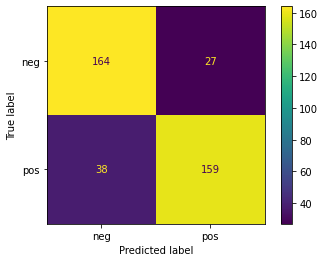

In [76]:
plot_confusion_matrix(pipe, X_test, y_test)

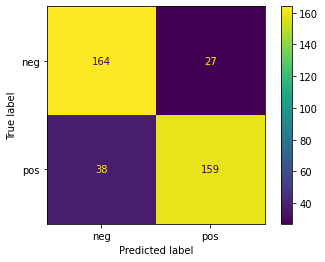

## Great job!